In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\szymo\Desktop\magisterka\Dane_2.csv', index_col=0) 

In [3]:
df.head()

YearMonth  PACJENT-ID Tetniak PACJENT-PŁEĆ  Badanie ogólne moczu__mASA  \
0   2010-10       11121    cold            K                         NaN   
1   2010-10       84661    cold            M                         NaN   
2   2010-10      115813    cold            K                         NaN   
3   2010-10      147689     sah            K                         NaN   
4   2010-10      354201    cold            K                         NaN   

   Badanie ogólne moczu__mBIL  Badanie ogólne moczu__mBLO  \
0                         0.0                         0.0   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

  Badanie ogólne moczu__mBarwa  Badanie ogólne moczu__mClar  \
0          BEZBARWNY/WODOJASNY                          0.0   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   Badanie ogólne moczu__mGLU  ...  Triglicerydy__TG  \
0                         0.0  ...               NaN   
1                         NaN  ...               NaN   
2                         NaN  ...               NaN   
3                         NaN  ...               NaN   
4                         NaN  ...             146.0   

   Wapń całkowity we krwi__Ca  \
0                         NaN   
1                         NaN   
2                         NaN   
3                         NaN   
4                         NaN   

   Wskaźnik filtracji kłębuszkowej (wg CKD-EPI)__eGFR CKD  \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

   Wskaźnik filtracji kłębuszkowej (wg MDRD)__eGFR -MDRD  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   Wskaźnik protrombinowy__INR Wskaźnik protrombinowy__W PT  \
0                          NaN                          NaN   
1                          NaN                         98.0   
2                          NaN                         84.0   
3                          NaN                         97.0   
4                          NaN                         35.0   

  Współczynnik APTT__W APTT  Troponina I wysokoczuła__hsTnI  Elektrolit_Na  \
0                       NaN                             NaN          138.0   
1                      0.87                             NaN          138.0   
2                      1.16                             NaN          139.5   
3                      1.04                             NaN          141.0   
4                       NaN                             NaN          143.0   

   Elektrolit_K  
0         5.000  
1         3.900  
2         3.575  
3         4.300  
4         5.300  

[5 rows x 80 columns]

In [4]:
nan_counts = df.isna().sum()

# Sort the counts in descending order
sorted_nan_counts = nan_counts.sort_values(ascending=False)

sorted_nan_counts.head(25)

Cholesterol HDL__HDL                 47782
Triglicerydy__TG                     47093
Wapń całkowity we krwi__Ca           46797
Cholesterol całkowity__CHOL          46775
Fosfataza alkaliczna__ALP            45175
Badanie osadu moczu__mNabPłaskie     44407
Czas protrombinowy__INR              44122
Badanie osadu moczu__mPasŚluzu       43842
Wskaźnik protrombinowy__INR          43671
Współczynnik APTT__W APTT            43266
Gammaglutamylotranspeptydaza__GGT    42710
Czas protrombinowy__W PT             41742
Pomiar parametrów życiowych__BMI     41370
Azot mocznika we krwi__BUN           40737
Badanie osadu moczu__mLeukoc         39627
INR__INR                             39588
Badanie osadu moczu__mErytroc        39328
Bilirubina całkowita we krwi__BIL    38942
Badanie ogólne moczu__mASA           38306
Badanie ogólne moczu__mSG            38230
Badanie ogólne moczu__mKET           38218
Badanie ogólne moczu__mBLO           38215
Badanie ogólne moczu__mpH            38214
Badanie ogó

In [5]:
#df = df[df['Tetniak'] != 'sah']


In [6]:
#podzial kolumn na kategoryczne i numeryczne
kat = []
numer = []
for i in df.columns[4:]:
    #print(str(i)+ ": " + str(len(df[i].unique())))
    if len(df[i].unique()) < 20:
        kat.append(i)
    else:
        numer.append(i)

In [7]:
df = df.drop(df[df["PACJENT-PŁEĆ"]!= 'K'][df["PACJENT-PŁEĆ"]!= 'M'].index) # usunięcie wiersza z niezidentyfikowaną płcią

C:\Users\szymo\AppData\Local\Temp\ipykernel_16028\1202601783.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[df["PACJENT-PŁEĆ"]!= 'K'][df["PACJENT-PŁEĆ"]!= 'M'].index) # usunięcie wiersza z niezidentyfikowaną płcią


In [8]:
df = df.drop(df[df['PACJENT-WIEK']> 120].index)

In [41]:
#df.replace({'Tetniak': {'Y' : 1, 'nieznany' : 0}}, inplace=True)
#df.replace({'Tetniak': {'cold' : 1, 'nieznany' : 0, 'sah' : 1}}, inplace=True) # bez sah
df.replace({'PACJENT-PŁEĆ': {'K' : 1, 'M' : 0}}, inplace=True)
df.replace({'Badanie ogólne moczu__mBarwa': {'BEZBARWNY/WODOJASNY' : 0, 'BURSZTYNOWY/BRUNATNY' : 1, 'BRAZOWY' : 2, 'POMARANCZOWY': 3, 'CZERWONY': 4, 'ZIELONO-NIEBIESKI': 5}}, inplace=True)
df.replace({'Badanie osadu moczu__mErytroc': {'0-3' : 0, '4-10' : 1, '11-15' : 2, '16-25': 3, 'pokrywająpolewidzenia': 4}}, inplace=True)
df.replace({'Badanie osadu moczu__mLeukoc': {'1-5' : 0, '6-10' : 1, '11-18' : 2, '19-25': 3, 'pokrywająpolewidzenia': 4}}, inplace=True)

In [10]:
from sklearn.impute import KNNImputer
# Imputacja dla danych numerycznych
imputer = KNNImputer(n_neighbors=5) 
imputed_data = imputer.fit_transform(df[numer])
imputed_df = pd.DataFrame(imputed_data, columns=numer)
df[numer] = imputed_df



In [11]:
from sklearn.impute import SimpleImputer
#imp_mean = SimpleImputer(missing_values=np.NaN, strategy='mean')
#df[numer] = imp_mean.fit_transform(df[numer])
imp_freq = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df[kat] = imp_freq.fit_transform(df[kat])

e:\Coding\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [12]:
# 108 obserwacji po knn
df.dropna(inplace=True)

In [13]:
np.any(np.isnan(df.iloc[:,3:])) 

False

In [14]:
df['PACJENT-PŁEĆ'].unique()

array([1, 0], dtype=int64)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55562 entries, 0 to 55669
Data columns (total 80 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   YearMonth                                               55562 non-null  object 
 1   PACJENT-ID                                              55562 non-null  int64  
 2   Tetniak                                                 55562 non-null  object 
 3   PACJENT-PŁEĆ                                            55562 non-null  int64  
 4   Badanie ogólne moczu__mASA                              55562 non-null  float64
 5   Badanie ogólne moczu__mBIL                              55562 non-null  float64
 6   Badanie ogólne moczu__mBLO                              55562 non-null  float64
 7   Badanie ogólne moczu__mBarwa                            55562 non-null  float64
 8   Badanie ogólne moczu__mClar         

In [16]:
nulls = df.isna().sum().sort_values(ascending= True)
nulls


YearMonth                    0
Morfologia__MPV              0
Morfologia__MONO             0
Morfologia__MCV              0
Morfologia__MCHC             0
                            ..
Białko C-reaktywne__CRP      0
Badanie ogólne moczu__mpH    0
Badanie ogólne moczu__mSG    0
Elektrolit_Na                0
Elektrolit_K                 0
Length: 80, dtype: int64

In [17]:
df[df['Tetniak'] == 1]['Tetniak'].count()

0

In [18]:
df[df['Tetniak'] == 1]['Tetniak'].count()/df[df['Tetniak'] == 0]['Tetniak'].count() # stosunek tetniakow do zdorwych

C:\Users\szymo\AppData\Local\Temp\ipykernel_16028\2860668521.py:1: RuntimeWarning: invalid value encountered in longlong_scalars
  df[df['Tetniak'] == 1]['Tetniak'].count()/df[df['Tetniak'] == 0]['Tetniak'].count() # stosunek tetniakow do zdorwych


nan

# Porównanie klas

In [19]:
df = df.drop(['YearMonth', 'PACJENT-ID'], axis=1)

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
df[df['Tetniak'] == 0].describe()

PACJENT-PŁEĆ  Badanie ogólne moczu__mASA  Badanie ogólne moczu__mBIL  \
count           0.0                         0.0                         0.0   
mean            NaN                         NaN                         NaN   
std             NaN                         NaN                         NaN   
min             NaN                         NaN                         NaN   
25%             NaN                         NaN                         NaN   
50%             NaN                         NaN                         NaN   
75%             NaN                         NaN                         NaN   
max             NaN                         NaN                         NaN   

       Badanie ogólne moczu__mBLO  Badanie ogólne moczu__mBarwa  \
count                         0.0                           0.0   
mean                          NaN                           NaN   
std                           NaN                           NaN   
min                           NaN                           NaN   
25%                           NaN                           NaN   
50%                           NaN                           NaN   
75%                           NaN                           NaN   
max                           NaN                           NaN   

       Badanie ogólne moczu__mClar  Badanie ogólne moczu__mGLU  \
count                          0.0                         0.0   
mean                           NaN                         NaN   
std                            NaN                         NaN   
min                            NaN                         NaN   
25%                            NaN                         NaN   
50%                            NaN                         NaN   
75%                            NaN                         NaN   
max                            NaN                         NaN   

       Badanie ogólne moczu__mKET  Badanie ogólne moczu__mLEU  \
count                         0.0                         0.0   
mean                          NaN                         NaN   
std                           NaN                         NaN   
min                           NaN                         NaN   
25%                           NaN                         NaN   
50%                           NaN                         NaN   
75%                           NaN                         NaN   
max                           NaN                         NaN   

       Badanie ogólne moczu__mNIT  Badanie ogólne moczu__mPRO  \
count                         0.0                         0.0   
mean                          NaN                         NaN   
std                           NaN                         NaN   
min                           NaN                         NaN   
25%                           NaN                         NaN   
50%                           NaN                         NaN   
75%                           NaN                         NaN   
max                           NaN                         NaN   

       Badanie ogólne moczu__mURO  Badanie osadu moczu__mErytroc  \
count                         0.0                            0.0   
mean                          NaN                            NaN   
std                           NaN                            NaN   
min                           NaN                            NaN   
25%                           NaN                            NaN   
50%                           NaN                            NaN   
75%                           NaN                            NaN   
max                           NaN                            NaN   

       Badanie osadu moczu__mLeukoc  Badanie osadu moczu__mNabPłaskie  \
count                           0.0                               0.0   
mean                            NaN                               NaN   
std                             NaN                               NaN   
min                

In [22]:
df[df['Tetniak'] == 1].describe()


PACJENT-PŁEĆ  Badanie ogólne moczu__mASA  Badanie ogólne moczu__mBIL  \
count           0.0                         0.0                         0.0   
mean            NaN                         NaN                         NaN   
std             NaN                         NaN                         NaN   
min             NaN                         NaN                         NaN   
25%             NaN                         NaN                         NaN   
50%             NaN                         NaN                         NaN   
75%             NaN                         NaN                         NaN   
max             NaN                         NaN                         NaN   

       Badanie ogólne moczu__mBLO  Badanie ogólne moczu__mBarwa  \
count                         0.0                           0.0   
mean                          NaN                           NaN   
std                           NaN                           NaN   
min                           NaN                           NaN   
25%                           NaN                           NaN   
50%                           NaN                           NaN   
75%                           NaN                           NaN   
max                           NaN                           NaN   

       Badanie ogólne moczu__mClar  Badanie ogólne moczu__mGLU  \
count                          0.0                         0.0   
mean                           NaN                         NaN   
std                            NaN                         NaN   
min                            NaN                         NaN   
25%                            NaN                         NaN   
50%                            NaN                         NaN   
75%                            NaN                         NaN   
max                            NaN                         NaN   

       Badanie ogólne moczu__mKET  Badanie ogólne moczu__mLEU  \
count                         0.0                         0.0   
mean                          NaN                         NaN   
std                           NaN                         NaN   
min                           NaN                         NaN   
25%                           NaN                         NaN   
50%                           NaN                         NaN   
75%                           NaN                         NaN   
max                           NaN                         NaN   

       Badanie ogólne moczu__mNIT  Badanie ogólne moczu__mPRO  \
count                         0.0                         0.0   
mean                          NaN                         NaN   
std                           NaN                         NaN   
min                           NaN                         NaN   
25%                           NaN                         NaN   
50%                           NaN                         NaN   
75%                           NaN                         NaN   
max                           NaN                         NaN   

       Badanie ogólne moczu__mURO  Badanie osadu moczu__mErytroc  \
count                         0.0                            0.0   
mean                          NaN                            NaN   
std                           NaN                            NaN   
min                           NaN                            NaN   
25%                           NaN                            NaN   
50%                           NaN                            NaN   
75%                           NaN                            NaN   
max                           NaN                            NaN   

       Badanie osadu moczu__mLeukoc  Badanie osadu moczu__mNabPłaskie  \
count                           0.0                               0.0   
mean                            NaN                               NaN   
std                             NaN                               NaN   
min                

In [23]:
df[df['Tetniak'] == 1].describe() - df[df['Tetniak'] == 0].describe()

PACJENT-PŁEĆ  Badanie ogólne moczu__mASA  Badanie ogólne moczu__mBIL  \
count           0.0                         0.0                         0.0   
mean            NaN                         NaN                         NaN   
std             NaN                         NaN                         NaN   
min             NaN                         NaN                         NaN   
25%             NaN                         NaN                         NaN   
50%             NaN                         NaN                         NaN   
75%             NaN                         NaN                         NaN   
max             NaN                         NaN                         NaN   

       Badanie ogólne moczu__mBLO  Badanie ogólne moczu__mBarwa  \
count                         0.0                           0.0   
mean                          NaN                           NaN   
std                           NaN                           NaN   
min                           NaN                           NaN   
25%                           NaN                           NaN   
50%                           NaN                           NaN   
75%                           NaN                           NaN   
max                           NaN                           NaN   

       Badanie ogólne moczu__mClar  Badanie ogólne moczu__mGLU  \
count                          0.0                         0.0   
mean                           NaN                         NaN   
std                            NaN                         NaN   
min                            NaN                         NaN   
25%                            NaN                         NaN   
50%                            NaN                         NaN   
75%                            NaN                         NaN   
max                            NaN                         NaN   

       Badanie ogólne moczu__mKET  Badanie ogólne moczu__mLEU  \
count                         0.0                         0.0   
mean                          NaN                         NaN   
std                           NaN                         NaN   
min                           NaN                         NaN   
25%                           NaN                         NaN   
50%                           NaN                         NaN   
75%                           NaN                         NaN   
max                           NaN                         NaN   

       Badanie ogólne moczu__mNIT  Badanie ogólne moczu__mPRO  \
count                         0.0                         0.0   
mean                          NaN                         NaN   
std                           NaN                         NaN   
min                           NaN                         NaN   
25%                           NaN                         NaN   
50%                           NaN                         NaN   
75%                           NaN                         NaN   
max                           NaN                         NaN   

       Badanie ogólne moczu__mURO  Badanie osadu moczu__mErytroc  \
count                         0.0                            0.0   
mean                          NaN                            NaN   
std                           NaN                            NaN   
min                           NaN                            NaN   
25%                           NaN                            NaN   
50%                           NaN                            NaN   
75%                           NaN                            NaN   
max                           NaN                            NaN   

       Badanie osadu moczu__mLeukoc  Badanie osadu moczu__mNabPłaskie  \
count                           0.0                               0.0   
mean                            NaN                               NaN   
std                             NaN                               NaN   
min                

1. Na tętniaka częsciej chorują kobiety  
2. Wszystkie wyniki z badań ogólnych moczu są obniżone dla osób chorych  
   Poza Badanie ogólne moczu__mNIT i Badanie ogólne moczu__mSG gdzie mamy bardzo małą różnicę  
   Badanie ogólne moczu__mpH lekko wyższa średnia
3. Średnia wieku chorego 58
4. Azot mocznika we krwi__BUN obniżony dla chorych   
   Białko C-reaktywne__CRP, Bilirubina całkowita we krwi__BIL, Czas częściowej tromboplastyny, Czas protrombinowy__INR, Czas protrombinowy__PT, Fosfataza alkaliczna__ALP, GGT, Glukoza, INR, Kreatynina niższe  
   CK-MB mass__CK-MB, Cholesterol, Czas protrombinowy__W PT 
5. Warto zwrócić uwagę na Morfologię: EO, IG, LYMPH, MONO, NEUT, HCT, MCH, MCV, PLT, RDW, WBC (niektóre chyba się powtarzają w formie % - do sprawdzenia)
6. Niższe BMI
7. Niższa Transaminaza
8. Wyższe Triglicerydy
9. Wyższy Wskaźnik filtracji kłębuszkowej
10. Wyższy Elektrolit_Na
11. Niższy Elektrolit_K

In [24]:
df[df['PACJENT-PŁEĆ']==0].shape[0]

25294

In [25]:
df[(df["Tetniak"] == 1) & (df["PACJENT-PŁEĆ"] == 0)].shape[0]/df[df['PACJENT-PŁEĆ']==0].shape[0] # chorzy mezczyzni

0.0

In [26]:
df[(df["Tetniak"] == 1) & (df["PACJENT-PŁEĆ"] == 1)].shape[0]/df[df['PACJENT-PŁEĆ']==1].shape[0] # chore kobiety

0.0

In [27]:
df[(df["Badanie ogólne moczu__mASA"] != 0) & (df["PACJENT-PŁEĆ"] == 1)]

Tetniak  PACJENT-PŁEĆ  Badanie ogólne moczu__mASA  \
464         sah             1                         2.0   
471         sah             1                         2.0   
493         sah             1                         2.0   
531         sah             1                         2.0   
627         sah             1                         3.0   
...         ...           ...                         ...   
55507  nieznany             1                         3.0   
55523  nieznany             1                         2.0   
55541  nieznany             1                         2.0   
55616  nieznany             1                         3.0   
55617  nieznany             1                         3.0   

       Badanie ogólne moczu__mBIL  Badanie ogólne moczu__mBLO  \
464                           0.0                         0.0   
471                           0.0                         3.0   
493                           0.0                         0.0   
531                           0.0                         0.0   
627                           0.0                         0.0   
...                           ...                         ...   
55507                         0.0                         0.0   
55523                         0.0                         0.0   
55541                         0.0                         0.0   
55616                         0.0                         0.0   
55617                         0.0                         0.0   

       Badanie ogólne moczu__mBarwa  Badanie ogólne moczu__mClar  \
464                             0.0                          1.0   
471                             0.0                          1.0   
493                             0.0                          0.0   
531                             0.0                          0.0   
627                             0.0                          0.0   
...                             ...                          ...   
55507                           0.0                          0.0   
55523                           0.0                          0.0   
55541                           0.0                          0.0   
55616                           0.0                          0.0   
55617                           0.0                          0.0   

       Badanie ogólne moczu__mGLU  Badanie ogólne moczu__mKET  \
464                           0.0                         0.0   
471                           0.0                         0.0   
493                           0.0                         0.0   
531                           1.0                         0.0   
627                           0.0                         0.0   
...                           ...                         ...   
55507                         0.0                         0.0   
55523                         0.0                         0.0   
55541                         0.0                         0.0   
55616                         0.0                         0.0   
55617                         0.0                         0.0   

       Badanie ogólne moczu__mLEU  Badanie ogólne moczu__mNIT  \
464                           3.0                         3.0   
471                           2.0                         3.0   
493                           0.0                         0.0   
531                           0.0                         0.0   
627                           0.0                         0.0   
...                           ...                         ...   
55507                         0.0                         0.0   
55523                         4.0                         0.0   
55541                         0.0                         0.0   
55616                         0.0                         0.0   
55617                         0.0                         0.0   

       Badanie ogólne moczu__mPRO  Badanie ogólne moczu__mURO  \
464                           2.0                 

In [25]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                PACJENT-PŁEĆ  Badanie ogólne moczu__mASA  \
PACJENT-PŁEĆ                        1.000000                    0.026902   
Badanie ogólne moczu__mASA          0.026902                    1.000000   
Badanie ogólne moczu__mBIL         -0.023259                    0.056992   
Badanie ogólne moczu__mBLO         -0.040013                    0.073451   
Badanie ogólne moczu__mBarwa       -0.033222                    0.040501   
...                                      ...                         ...   
Wskaźnik protrombinowy__W PT        0.041590                   -0.004769   
Współczynnik APTT__W APTT          -0.037650                    0.006356   
Troponina I wysokoczuła__hsTnI     -0.018793                   -0.001601   
Elektrolit_Na                      -0.024781                   -0.005283   
Elektrolit_K                       -0.102442                    0.002191   

                                Badanie ogólne moczu__mBIL  \
PACJENT-PŁEĆ             

# Wizualizacje + Sweetviz

In [ ]:
import sweetviz as sv

my_report = sv.analyze(df_merged, target_feat = 'Tetniak')
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [47]:
dfplot0 = df[df['Tetniak']==0].iloc[:4300,:]
dfplot1 = df[df['Tetniak']==1].iloc[:4300,:]
df_merged = dfplot0.append(dfplot1, ignore_index=True)

C:\Users\szymo\AppData\Local\Temp\ipykernel_16028\1953184846.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = dfplot0.append(dfplot1, ignore_index=True)


In [48]:
df_merged[df_merged["Tetniak"] == 0]["Elektrolit_K"].describe()

count    4300.000000
mean        4.350050
std         0.467492
min         2.800000
25%         4.100000
50%         4.300000
75%         4.600000
max         7.200000
Name: Elektrolit_K, dtype: float64

In [49]:
df_merged[df_merged["Tetniak"] == 0]["Elektrolit_K"].median()

4.3

<AxesSubplot:xlabel='Elektrolit_K', ylabel='Count'>

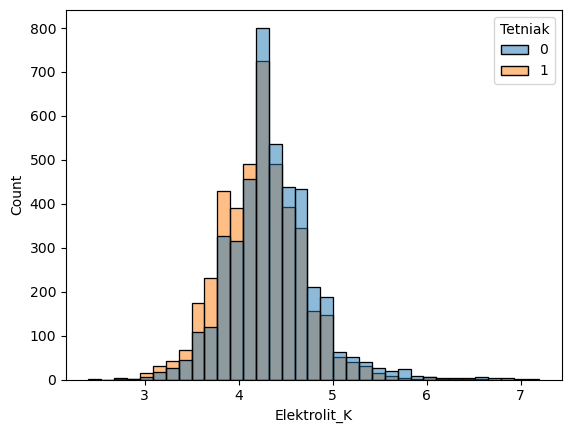

In [50]:
#fig, ax1 = plt.subplots()
#ax2 = ax1.twinx() # secondary y-axis


sns.histplot(data=df_merged, x="Elektrolit_K", hue="Tetniak", bins=35)
#sns.pointplot(data=df_merged, x="Elektrolit_K",  color='#333', ax=ax2, errorbar=None) # on secondary ax2

# sns.lineplot(x='index', y='Col2', color='#333', data=df.reset_index(), ax=ax2)

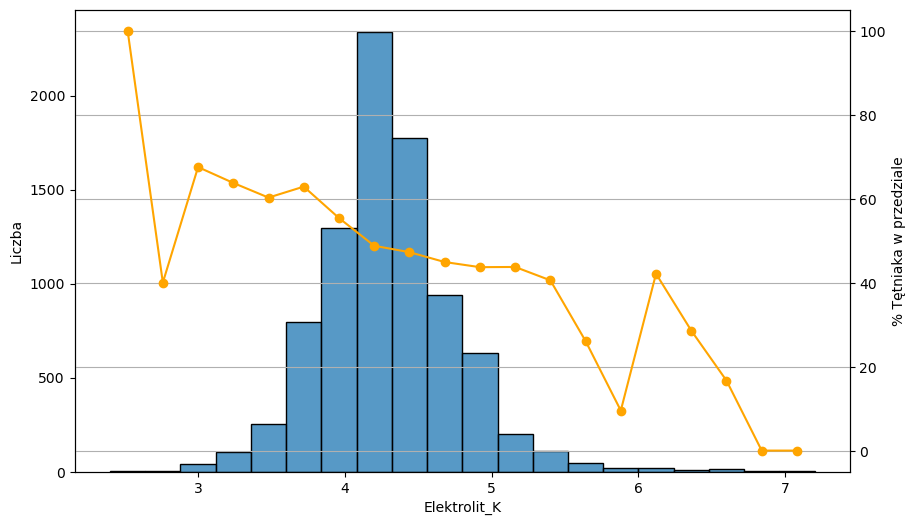

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
#  Tworzenie histogramu badanej cechy
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(data=df_merged, x='Elektrolit_K', bins=20, kde=False)
ax1.set_ylabel("Liczba")

# Kalkulowanie procentowej obecnosci klasy tetniakowej w kazdym z przedzialow
hist, bin_edges = np.histogram(df_merged['Elektrolit_K'], bins=20)
hist_class_1, _ = np.histogram(df_merged[df_merged['Tetniak'] == 1]['Elektrolit_K'], bins=bin_edges)
percentages = (hist_class_1 / hist) * 100 if not np.all(hist == 0) else np.zeros(len(hist))

# Nanoszenie wykresu procentowego na histogram
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
ax2 = ax1.twinx()
ax2.plot(bin_centers, percentages, marker='o', linestyle='-', color='orange')
ax2.set_ylabel("% Tętniaka w przedziale")


plt.xlabel("Elektrolit_K")
plt.grid()
plt.show()

In [75]:
df_merged[df_merged["Tetniak"] == 0]["Morfologia__NEUT"].describe()

count    4300.000000
mean        6.463290
std         3.362107
min         0.010000
25%         4.147250
50%         5.820000
75%         7.971000
max        32.277500
Name: Morfologia__NEUT, dtype: float64

In [76]:
df_merged[df_merged["Tetniak"] == 1]["Morfologia__NEUT"].describe()

count    4300.000000
mean        6.119916
std         2.878417
min         0.025000
25%         4.235500
50%         5.581750
75%         7.336833
max        27.495000
Name: Morfologia__NEUT, dtype: float64

In [77]:
df_merged[df_merged["Tetniak"] == 0]["Morfologia__NEUT"].median()

5.82

In [78]:
df_merged[df_merged["Tetniak"] == 1]["Morfologia__NEUT"].median()

5.58175

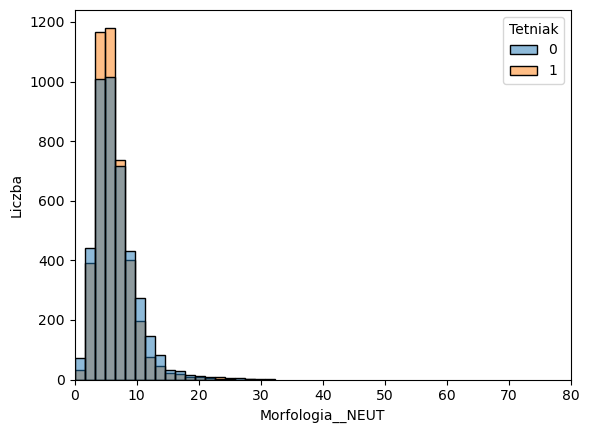

In [54]:

fig, ax = plt.subplots()

sns.histplot(data=df_merged, x="Morfologia__NEUT", hue="Tetniak", bins=20)
ax.set_xlim(0,80)
ax.set_ylabel('Liczba')
plt.show()

[ 0.47096429  1.39289286  2.31482143  3.23675     4.15867857  5.08060714
  6.00253571  6.92446429  7.84639286  8.76832143  9.69025    10.61217857
 11.53410714 12.45603571 13.37796429 14.29989286 15.22182143 16.14375
 17.06567857 17.98760714 18.90953571 19.83146429 20.75339286 21.67532143
 22.59725    23.51917857 24.44110714 25.36303571 26.28496429 27.20689286
 28.12882143 29.05075    29.97267857 30.89460714 31.81653571]


C:\Users\szymo\AppData\Local\Temp\ipykernel_16028\1499794884.py:9: RuntimeWarning: invalid value encountered in true_divide
  percentages = (hist_class_1 / hist) * 100 if not np.all(hist == 0) else np.zeros(len(hist))


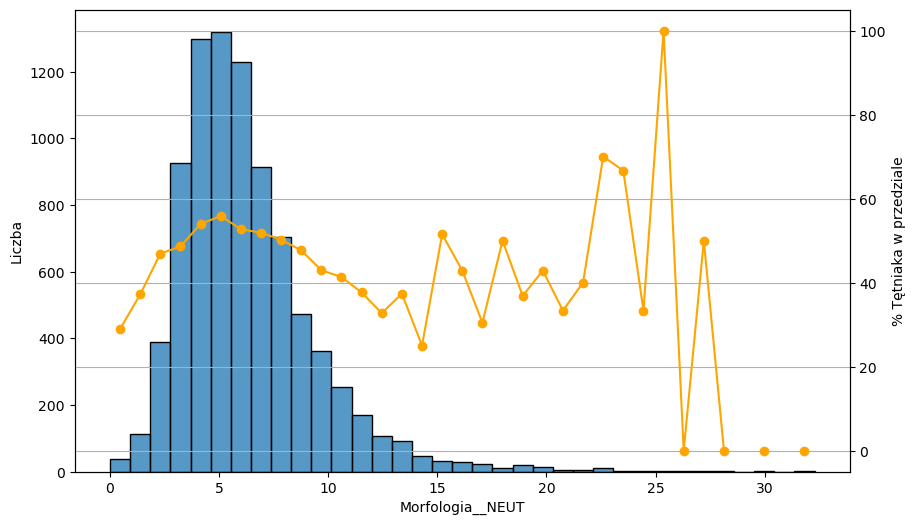

In [55]:
# Create a histogram of the 'feature' column
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(data=df_merged, x='Morfologia__NEUT', bins=35, kde=False)
ax1.set_ylabel("Liczba")

# Calculate the percentage of class 1 observations in each bin
hist, bin_edges = np.histogram(df_merged['Morfologia__NEUT'], bins=35)
hist_class_1, _ = np.histogram(df_merged[df_merged['Tetniak'] == 1]['Morfologia__NEUT'], bins=bin_edges)
percentages = (hist_class_1 / hist) * 100 if not np.all(hist == 0) else np.zeros(len(hist))

# Create a line plot for the percentages of class 1 observations
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
ax2 = ax1.twinx()
ax2.plot(bin_centers, percentages, marker='o', linestyle='-', color='orange')
ax2.set_ylabel("% Tętniaka w przedziale")

print (bin_centers)
# Configure the plot
plt.xlabel("Morfologia__NEUT")

plt.grid()

# Display the combined plot
plt.show()

In [56]:
df_merged[df_merged["Tetniak"] == 0]["Azot mocznika we krwi__BUN"].describe()

count    4300.000000
mean       24.175035
std        13.836786
min         3.000000
25%        15.000000
50%        21.180000
75%        29.100000
max       169.000000
Name: Azot mocznika we krwi__BUN, dtype: float64

In [69]:
df_merged[df_merged["Tetniak"] == 1]["Azot mocznika we krwi__BUN"].describe()

count    4300.000000
mean       22.787140
std        11.181737
min         3.900000
25%        15.000000
50%        20.540000
75%        28.000000
max       104.000000
Name: Azot mocznika we krwi__BUN, dtype: float64

In [57]:
df_merged[df_merged["Tetniak"] == 0]["Azot mocznika we krwi__BUN"].median()

21.18

In [70]:
df_merged[df_merged["Tetniak"] == 1]["Azot mocznika we krwi__BUN"].median()

20.54

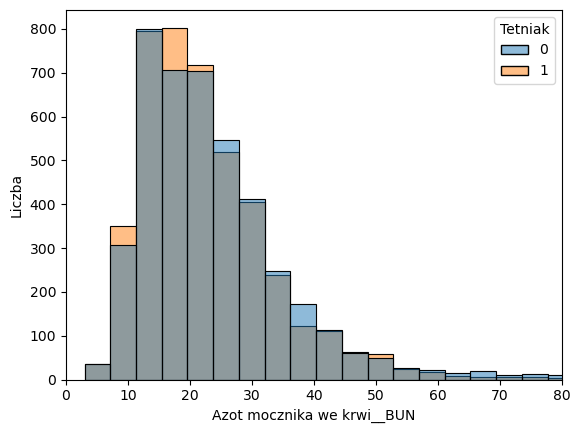

In [58]:
fig, ax = plt.subplots()

sns.histplot(data=df_merged, x="Azot mocznika we krwi__BUN", hue="Tetniak", bins=40)
ax.set_xlim(0,80)
ax.set_ylabel('Liczba')
plt.show()

C:\Users\szymo\AppData\Local\Temp\ipykernel_16028\2573129877.py:9: RuntimeWarning: invalid value encountered in true_divide
  percentages = (hist_class_1 / hist) * 100 if not np.all(hist == 0) else np.zeros(len(hist))


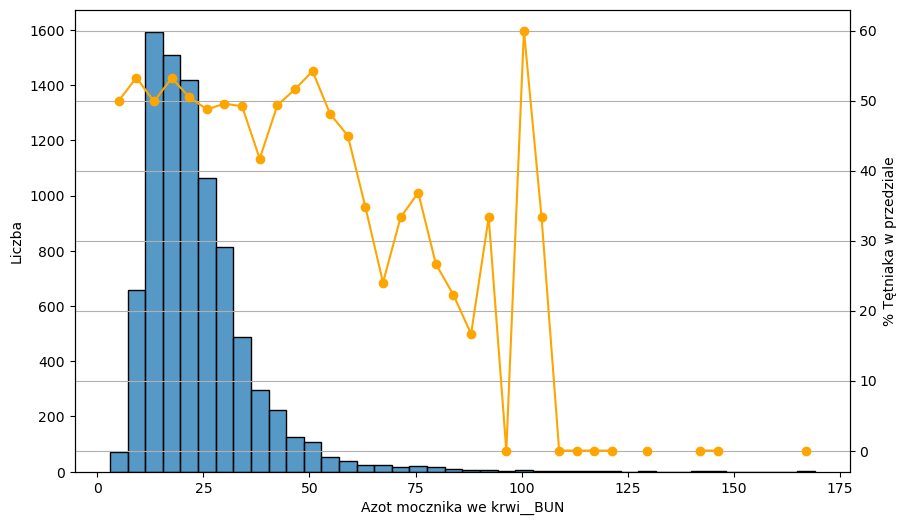

In [59]:

# Create a histogram of the 'feature' column
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(data=df_merged, x="Azot mocznika we krwi__BUN", bins=40, kde=False)
ax1.set_ylabel("Liczba")

# Calculate the percentage of class 1 observations in each bin
hist, bin_edges = np.histogram(df_merged["Azot mocznika we krwi__BUN"], bins=40)
hist_class_1, _ = np.histogram(df_merged[df_merged['Tetniak'] == 1]["Azot mocznika we krwi__BUN"], bins=bin_edges)
percentages = (hist_class_1 / hist) * 100 if not np.all(hist == 0) else np.zeros(len(hist))

# Create a line plot for the percentages of class 1 observations
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
ax2 = ax1.twinx()
ax2.plot(bin_centers, percentages, marker='o', linestyle='-', color='orange')
ax2.set_ylabel("% Tętniaka w przedziale")

# Configure the plot
plt.xlabel("Azot mocznika we krwi__BUN")

plt.grid()

# Display the combined plot
plt.show()

In [74]:
df_merged[df_merged["Tetniak"] == 0]["Białko C-reaktywne__CRP"].describe()

count    4300.000000
mean       28.972441
std        50.208521
min         0.280000
25%         1.977500
50%         8.009000
75%        30.574000
max       478.300000
Name: Białko C-reaktywne__CRP, dtype: float64

In [71]:
df_merged[df_merged["Tetniak"] == 1]["Białko C-reaktywne__CRP"].describe()

count    4300.000000
mean       28.719824
std        44.408755
min         0.070000
25%         3.703000
50%        13.641429
75%        31.935333
max       478.710000
Name: Białko C-reaktywne__CRP, dtype: float64

In [72]:
df_merged[df_merged["Tetniak"] == 0]["Białko C-reaktywne__CRP"].median()

8.009

In [73]:
df_merged[df_merged["Tetniak"] == 1]["Białko C-reaktywne__CRP"].median()

13.641428571428571

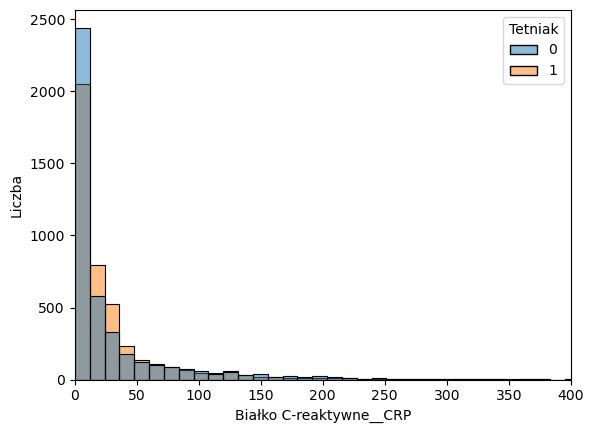

In [62]:
fig, ax = plt.subplots()

sns.histplot(data=df_merged, x="Białko C-reaktywne__CRP", hue="Tetniak", bins = 40)
ax.set_xlim(0,400)
ax.set_ylabel('Liczba')
plt.show()

C:\Users\szymo\AppData\Local\Temp\ipykernel_16028\3503810220.py:9: RuntimeWarning: invalid value encountered in true_divide
  percentages = (hist_class_1 / hist) * 100 if not np.all(hist == 0) else np.zeros(len(hist))


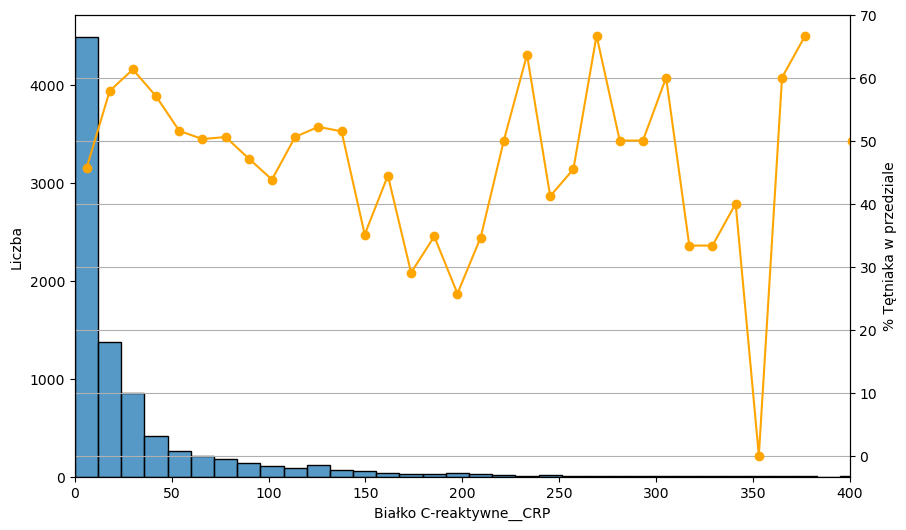

In [63]:
# Create a histogram of the 'feature' column
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(data=df_merged, x="Białko C-reaktywne__CRP", bins=40, kde=False)
ax1.set_ylabel("Liczba")

# Calculate the percentage of class 1 observations in each bin
hist, bin_edges = np.histogram(df_merged["Białko C-reaktywne__CRP"], bins=40)
hist_class_1, _ = np.histogram(df_merged[df_merged['Tetniak'] == 1]["Białko C-reaktywne__CRP"], bins=bin_edges)
percentages = (hist_class_1 / hist) * 100 if not np.all(hist == 0) else np.zeros(len(hist))

# Create a line plot for the percentages of class 1 observations
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
ax2 = ax1.twinx()
ax2.plot(bin_centers, percentages, marker='o', linestyle='-', color='orange')
ax2.set_ylabel("% Tętniaka w przedziale")

ax2.set_xlim(0,400)
# Configure the plot
plt.xlabel("Białko C-reaktywne__CRP")

plt.grid()

# Display the combined plot
plt.show()

In [64]:
# Obliczenie macierzy korelacji
correlation_matrix = df_cold.corr()

# Wyodrębnienie korelacji dla kolumny "xyz"
correlations_xyz = correlation_matrix['Tetniak'].sort_values(ascending=False)

# Wyświetlenie 20 najbardziej skorelowanych kolumn z "xyz"
top_correlations = correlations_xyz.head(16)  # 21, bo pierwsza wartość to sama kolumna "xyz"
print(top_correlations)

Tetniak                        1.000000
Morfologia__% LYMPH            0.059826
Morfologia__% EO               0.054322
PACJENT-WIEK                   0.035790
INR__INR                       0.032787
PACJENT-PŁEĆ                   0.029095
Morfologia__% MONO             0.027300
Morfologia__EO                 0.025689
Morfologia__HCT                0.022977
Morfologia__HGB                0.021713
Morfologia__RBC                0.021356
Morfologia__% BAZO             0.020602
Czas protrombinowy__W PT       0.016067
Wapń całkowity we krwi__Ca     0.013046
Czas protrombinowy__PT         0.012830
Cholesterol całkowity__CHOL    0.012544
Name: Tetniak, dtype: float64


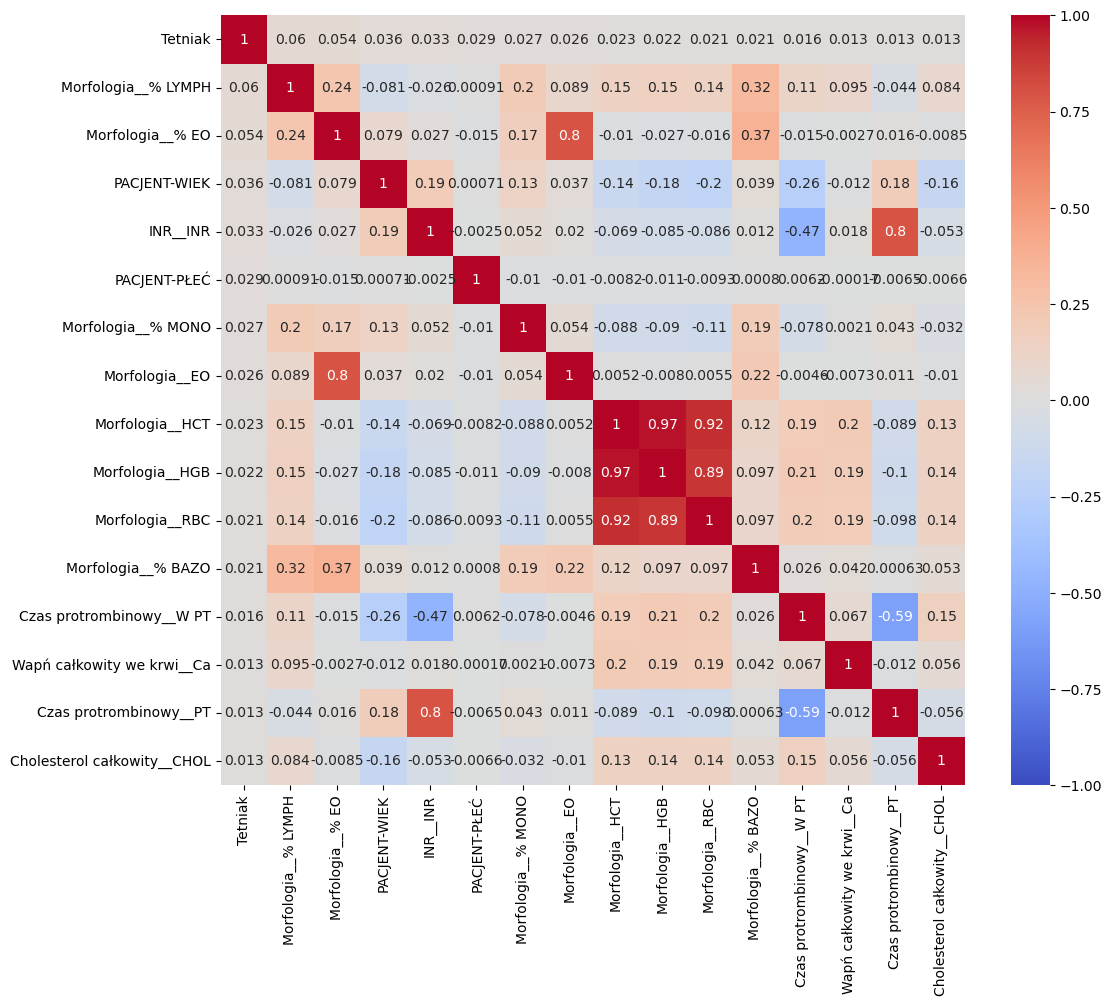

In [159]:
# Wyodrębnienie 20 najbardziej skorelowanych kolumn z "xyz"
top_cols = top_correlations.index
sub_matrix = correlation_matrix.loc[top_cols, top_cols]

# Ustawienie wielkości rysunku
plt.figure(figsize=(12, 10))

# Rysowanie mapy cieplnej dla podzbioru
sns.heatmap(sub_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Ustawienie tytułu i wyświetlenie rysunku
#plt.title('Macierz korelacji dla najbardziej skorelowanych zmiennych z kolumną Tętniak')
plt.show()


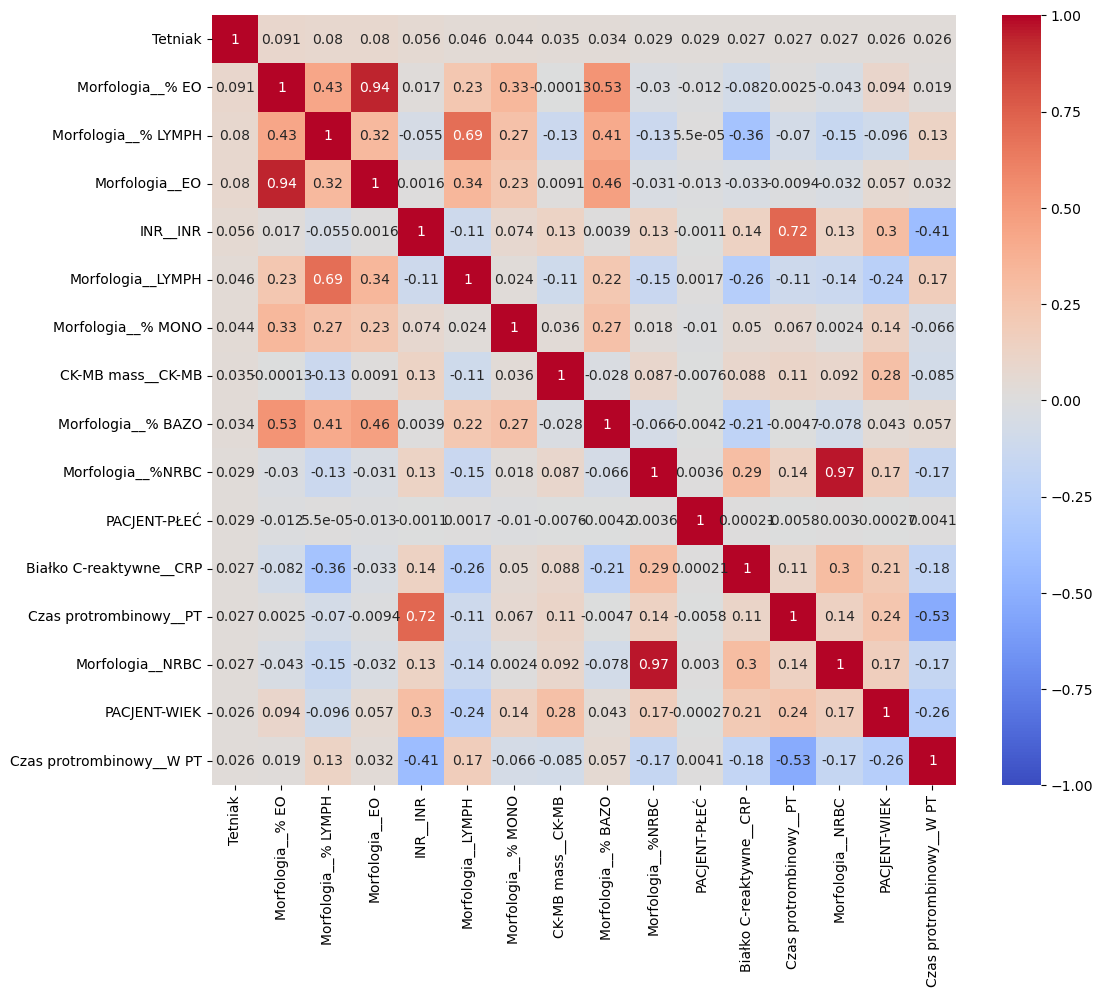

In [68]:
# Obliczenie macierzy korelacji Spearmana
spearman_correlation_matrix = df_cold.corr(method='spearman')

# Wyodrębnienie korelacji dla kolumny "Tętniak"
spearman_correlations_xyz = spearman_correlation_matrix['Tetniak'].sort_values(ascending=False)

# Wyświetlenie 20 najbardziej skorelowanych kolumn z "Tętniak"
top_spearman_correlations = spearman_correlations_xyz.head(16)  # Zakładamy, że "Tętniak" jest też uwzględniony
top_cols_spearman = top_spearman_correlations.index
sub_spearman_matrix = spearman_correlation_matrix.loc[top_cols_spearman, top_cols_spearman]

# Ustawienie wielkości rysunku
plt.figure(figsize=(12, 10))

# Rysowanie mapy cieplnej dla podzbioru korelacji Spearmana
sns.heatmap(sub_spearman_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Ustawienie tytułu i wyświetlenie rysunku
#plt.title('Macierz korelacji Spearmana dla najbardziej skorelowanych zmiennych z kolumną Tętniak')
plt.show()

In [160]:
from scipy import stats
# Tworzenie tablicy kontyngencji
contingency_table1 = pd.crosstab(df['Tetniak'], df['Morfologia__% LYMPH'])
contingency_table2 = pd.crosstab(df['Tetniak'], df['Morfologia__% EO'])
contingency_table3 = pd.crosstab(df['Tetniak'], df['Wapń całkowity we krwi__Ca'])
contingency_table4 = pd.crosstab(df['Tetniak'], df['PACJENT-WIEK'])
contingency_table5 = pd.crosstab(df['Tetniak'], df['Cholesterol całkowity__CHOL'])
contingency_table6 = pd.crosstab(df['Tetniak'], df['PACJENT-PŁEĆ'])
contingency_table7 = pd.crosstab(df['Tetniak'], df['Cholesterol HDL__HDL'])
contingency_table8 = pd.crosstab(df['Tetniak'], df['Morfologia__% MONO'])
contingency_table9 = pd.crosstab(df['Tetniak'], df['Morfologia__HCT'])
contingency_table10 = pd.crosstab(df['Tetniak'], df['Morfologia__RBC'])

# Obliczenie współczynnika korelacji Phi
phi_coefficient1 = stats.contingency.association(contingency_table1)
phi_coefficient2 = stats.contingency.association(contingency_table2)
phi_coefficient3 = stats.contingency.association(contingency_table3)
phi_coefficient4 = stats.contingency.association(contingency_table4)
phi_coefficient5 = stats.contingency.association(contingency_table5)
phi_coefficient6 = stats.contingency.association(contingency_table6)
phi_coefficient7 = stats.contingency.association(contingency_table7)
phi_coefficient8 = stats.contingency.association(contingency_table8)
phi_coefficient9 = stats.contingency.association(contingency_table9)
phi_coefficient10 = stats.contingency.association(contingency_table10)

print(f'Korelacja Phi: {phi_coefficient1}')
print(f'Korelacja Phi: {phi_coefficient2}')
print(f'Korelacja Phi: {phi_coefficient3}')
print(f'Korelacja Phi: {phi_coefficient4}')
print(f'Korelacja Phi: {phi_coefficient5}')
print(f'Korelacja Phi: {phi_coefficient6}')
print(f'Korelacja Phi: {phi_coefficient7}')
print(f'Korelacja Phi: {phi_coefficient8}')
print(f'Korelacja Phi: {phi_coefficient9}')
print(f'Korelacja Phi: {phi_coefficient10}')

Korelacja Phi: 0.6306674569595085
Korelacja Phi: 0.5068646630439607
Korelacja Phi: 0.2010594459188374
Korelacja Phi: 0.1865697588881186
Korelacja Phi: 0.21305105964146936
Korelacja Phi: 0.04722752683947926
Korelacja Phi: 0.13494180105275264
Korelacja Phi: 0.3635101126458505
Korelacja Phi: 0.407229723719293
Korelacja Phi: 0.42643190234836564


# SVC

In [79]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, fbeta_score, balanced_accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [29]:
#df = df.reset_index() 
#df = df.iloc[:, 1:]

In [30]:
df.shape

(55562, 78)

In [31]:
df_cold = df[df['Tetniak'] != 'sah']


In [32]:
#df_cold = df_cold.drop(['Pomiar parametrów życiowych__BMI', 'Morfologia__%NRBC', 'Troponina I wysokoczuła__hsTnI', 'Badanie osadu moczu__mNabPłaskie', 'CK-MB mass__CK-MB', 'Badanie ogólne moczu__mLEU', 'Morfologia__MCHC', 'Morfologia__HGB', 'Morfologia__WBC', 'Czas protrombinowy__INR', 'Bilirubina całkowita we krwi__BIL', 'Morfologia__% MONO', 'Triglicerydy__TG', 'Morfologia__MCH'], axis=1)

In [33]:
df_cold.shape

(53500, 78)

In [34]:
df_cold.replace({'Tetniak': {'cold' : 1, 'sah' : 1, 'nieznany' : 0}}, inplace=True)


C:\Users\szymo\AppData\Local\Temp\ipykernel_16028\3570404492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cold.replace({'Tetniak': {'cold' : 1, 'sah' : 1, 'nieznany' : 0}}, inplace=True)


In [36]:
# All zimne
# Podzial zbioru na zmienne wyjaśniające i wyjaśniane
X = df_cold.iloc[:, 1:]  # Zmienne egzogeniczne
y = df_cold["Tetniak"]  # Zmienna endogeniczna

# Podział na zbiór treningowy i testowy
X_train_cold, X_test_cold, y_train_cold, y_test_cold = train_test_split(
    X, y, test_size=0.20, random_state=42
)

X_train_cold.shape, X_test_cold.shape, y_train_cold.shape, y_test_cold.shape

((42800, 77), (10700, 77), (42800,), (10700,))

In [37]:
# usuniecie czesci testowej z calego zbioru (z tetniakami peknietymi)
df_bez_testu = df.loc[~df.index.isin(X_test_cold.index)]

In [38]:
df_bez_testu.replace({'Tetniak': {'cold' : 1, 'sah' : 1, 'nieznany' : 0}}, inplace=True)

C:\Users\szymo\AppData\Local\Temp\ipykernel_16028\2914332901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bez_testu.replace({'Tetniak': {'cold' : 1, 'sah' : 1, 'nieznany' : 0}}, inplace=True)


In [39]:
df_bez_testu

Tetniak  PACJENT-PŁEĆ  Badanie ogólne moczu__mASA  \
0            1             1                         0.0   
1            1             0                         0.0   
2            1             1                         0.0   
3            1             1                         0.0   
4            1             1                         0.0   
...        ...           ...                         ...   
55664        0             1                         0.0   
55666        1             0                         0.0   
55667        1             0                         0.0   
55668        1             0                         0.0   
55669        1             1                         0.0   

       Badanie ogólne moczu__mBIL  Badanie ogólne moczu__mBLO  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
55664                         0.0                         0.0   
55666                         0.0                         0.0   
55667                         0.0                         0.0   
55668                         0.0                         1.0   
55669                         0.0                         0.0   

       Badanie ogólne moczu__mBarwa  Badanie ogólne moczu__mClar  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          0.0   
3                               0.0                          0.0   
4                               0.0                          0.0   
...                             ...                          ...   
55664                           0.0                          0.0   
55666                           0.0                          0.0   
55667                           0.0                          0.0   
55668                           0.0                          3.0   
55669                           0.0                          0.0   

       Badanie ogólne moczu__mGLU  Badanie ogólne moczu__mKET  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
55664                         0.0                         0.0   
55666                         0.0                         0.0   
55667                         0.0                         0.0   
55668                         0.0                         0.0   
55669                         0.0                         0.0   

       Badanie ogólne moczu__mLEU  Badanie ogólne moczu__mNIT  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
55664                         0.0                         0.0   
55666                         0.0                         0.0   
55667                         0.0                         0.0   
55668                         4.0                         0.0   
55669                         0.0                         0.0   

       Badanie ogólne moczu__mPRO  Badanie ogólne moczu__mURO  \
0                             0.0                         0.0

ALL base Cold + SAH

In [40]:
# dane treningowe z wszystkimi sahami

X_train_sah = df_bez_testu.iloc[:, 1:]
y_train_sah = df_bez_testu["Tetniak"]

X_train_sah.shape, X_test_cold.shape, y_train_sah.shape, y_test_cold.shape

((44862, 77), (10700, 77), (44862,), (10700,))

In [65]:
clf = make_pipeline(StandardScaler(), SVC(kernel= "rbf", gamma='scale', class_weight= 'balanced')) 
clf.fit(X_train_sah, y_train_sah)
y_pred = clf.predict(X_test_cold)

In [66]:
print(classification_report(y_test_cold, y_pred))
confusion_matrix(y_test_cold, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     10252
           1       0.35      0.83      0.49       458

    accuracy                           0.93     10710
   macro avg       0.67      0.88      0.73     10710
weighted avg       0.96      0.93      0.94     10710



array([[9547,  705],
       [  79,  379]], dtype=int64)

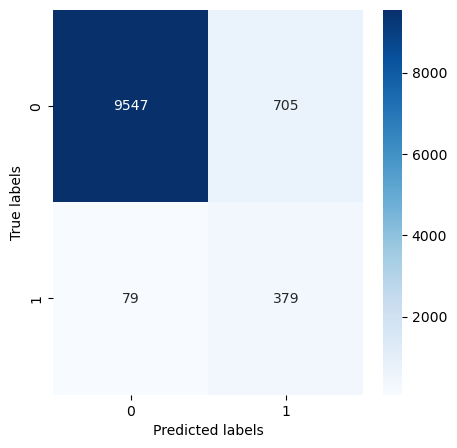

In [67]:
cm = confusion_matrix(y_test_cold, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust the size (5,5) as per your requirements

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [68]:

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_cold, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_cold, y_pred))

# Model F2: F1 but more for recall
print("fbeta:",metrics.fbeta_score(y_test_cold, y_pred, beta=2))

# 
print("AUC Score:", metrics.roc_auc_score(y_test_cold, y_pred))

Precision: 0.3496309963099631
Recall: 0.8275109170305677
fbeta: 0.6498628257887518
AUC Score: 0.8793719235952683


In [69]:
clf = make_pipeline(StandardScaler(), SVC(kernel= "rbf", gamma='scale', class_weight= 'balanced', C= 0.6854638962825292)) # Kernel type: 'linear', 'poly', 'rbf', 'sigmoid', or 'precomputed'
clf.fit(X_train_sah, y_train_sah)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.6854638962825292, class_weight='balanced'))])

In [70]:
y_pred = clf.predict(X_test_cold)
print(classification_report(y_test_cold, y_pred))
confusion_matrix(y_test_cold, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     10252
           1       0.32      0.83      0.47       458

    accuracy                           0.92     10710
   macro avg       0.66      0.88      0.71     10710
weighted avg       0.96      0.92      0.94     10710



array([[9462,  790],
       [  78,  380]], dtype=int64)

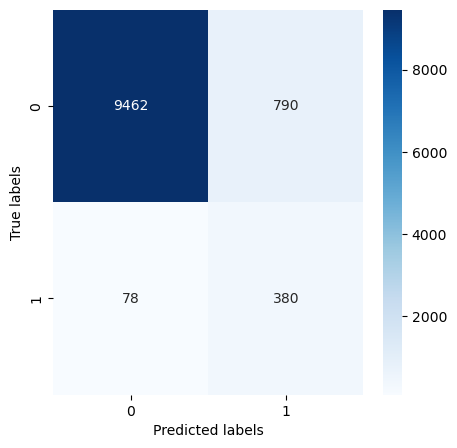

In [71]:
cm = confusion_matrix(y_test_cold, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust the size (5,5) as per your requirements

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [72]:

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_cold, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_cold, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("fbeta:",metrics.fbeta_score(y_test_cold, y_pred, beta=2))

print("Balanced Accuracy:",metrics.balanced_accuracy_score(y_test_cold, y_pred))

# 
print("AUC Score:", metrics.roc_auc_score(y_test_cold, y_pred))

Precision: 0.3247863247863248
Recall: 0.8296943231441049
fbeta: 0.6329113924050632
Balanced Accuracy: 0.8763180940730279
AUC Score: 0.8763180940730279


In [133]:
clf = make_pipeline(StandardScaler(), SVC(kernel= "rbf", gamma='scale', class_weight= 'balanced', C= 7.306458969884712)) # 10.7253060092
#clf = svm.SVC(gamma='auto', class_weight= 'balanced')
clf.fit(X_train_sah, y_train_sah)
y_pred = clf.predict(X_test_cold)
#4.769675980918181 7.306458969884712, 8.10225677370286

In [134]:
print(classification_report(y_test_cold, y_pred))
confusion_matrix(y_test_cold, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     10252
           1       0.42      0.82      0.56       458

    accuracy                           0.94     10710
   macro avg       0.71      0.89      0.77     10710
weighted avg       0.97      0.94      0.95     10710



array([[9743,  509],
       [  82,  376]], dtype=int64)

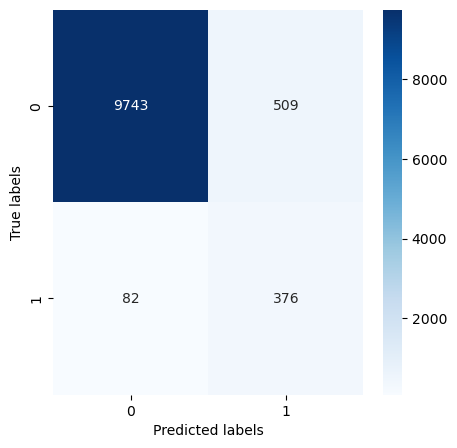

In [135]:
cm = confusion_matrix(y_test_cold, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust the size (5,5) as per your requirements

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [136]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_cold, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_cold, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("fbeta:",metrics.fbeta_score(y_test_cold, y_pred, beta=2))

print("Balanced Accuracy:",metrics.balanced_accuracy_score(y_test_cold, y_pred))

Precision: 0.4248587570621469
Recall: 0.8209606986899564
fbeta: 0.6919396393080604
Balanced Accuracy: 0.885655924842442


ALL base Cold

In [137]:
clf = make_pipeline(StandardScaler(), SVC(kernel= "rbf", gamma='auto', class_weight= 'balanced')) # Kernel type: 'linear', 'poly', 'rbf', 'sigmoid', or 'precomputed'
#clf = svm.SVC(gamma='auto', class_weight= 'balanced')
clf.fit(X_train_cold, y_train_cold)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', gamma='auto'))])

In [138]:
print(classification_report(y_test_cold, y_pred))
confusion_matrix(y_test_cold, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     10252
           1       0.42      0.82      0.56       458

    accuracy                           0.94     10710
   macro avg       0.71      0.89      0.77     10710
weighted avg       0.97      0.94      0.95     10710



array([[9743,  509],
       [  82,  376]], dtype=int64)

In [139]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_cold, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_cold, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("fbeta:",metrics.fbeta_score(y_test_cold, y_pred, beta=2))

print("Balanced Accuracy:",metrics.balanced_accuracy_score(y_test_cold, y_pred))

Precision: 0.4248587570621469
Recall: 0.8209606986899564
fbeta: 0.6919396393080604
Balanced Accuracy: 0.885655924842442


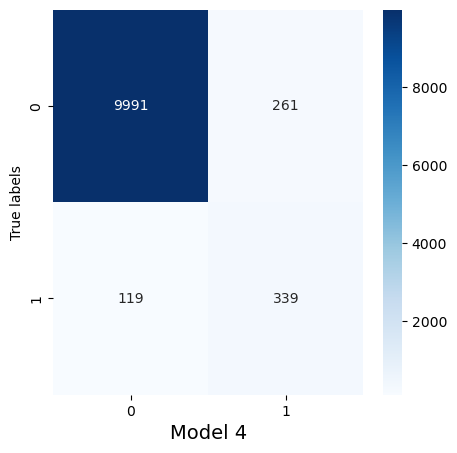

In [160]:
cm = confusion_matrix(y_test_cold, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust the size (5,5) as per your requirements

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_xlabel('Model 4', fontsize=14)
ax.set_ylabel('True labels')
plt.show()

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(kernel= "rbf", gamma='auto', class_weight= 'balanced', C= 4.769675980918181 )) # 995.3077666738272 4.769675980918181  97.14170037320825
#clf = svm.SVC(gamma='auto', class_weight= 'balanced')
clf.fit(X_train_cold, y_train_cold)
y_pred = clf.predict(X_test_cold)

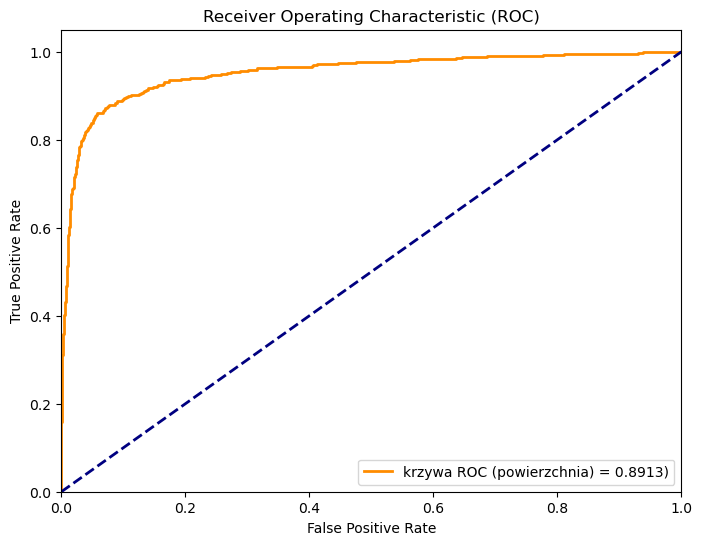

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Oblicz krzywą ROC i pole pod krzywą AUC
fpr, tpr, _ = roc_curve(y_test_cold, clf.decision_function(X_test_cold))
#roc_auc = auc(fpr, tpr)

# Wygeneruj wykres krzywej ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='krzywa ROC (powierzchnia) = {:.4f})'.format(metrics.roc_auc_score(y_test_cold, y_pred)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [30]:
print(classification_report(y_test_cold, y_pred))
confusion_matrix(y_test_cold, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     10252
           1       0.45      0.83      0.58       458

    accuracy                           0.95     10710
   macro avg       0.72      0.89      0.78     10710
weighted avg       0.97      0.95      0.96     10710



array([[9792,  460],
       [  79,  379]], dtype=int64)

In [39]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_cold, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_cold, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("fbeta:",metrics.fbeta_score(y_test_cold, y_pred, beta=2))

print("Balanced Accuracy:",metrics.balanced_accuracy_score(y_test_cold, y_pred))

# 
print("AUC Score:", metrics.roc_auc_score(y_test_cold, y_pred))

Precision: 0.45172824791418353
Recall: 0.8275109170305677
fbeta: 0.7094721078247846
Balanced Accuracy: 0.8913208116171176
AUC Score: 0.8913208116171176


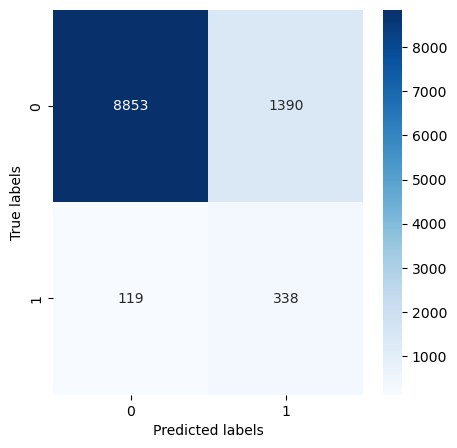

In [104]:
cm = confusion_matrix(y_test_cold, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust the size (5,5) as per your requirements

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [114]:
clf.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('svc', SVC(C=4.769675980918181, class_weight='balanced', gamma='auto'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(C=4.769675980918181, class_weight='balanced', gamma='auto'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 4.769675980918181,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': 'balanced',
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'auto',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [103]:
clf = make_pipeline(StandardScaler(), SVC(kernel= "rbf", gamma='auto', class_weight= 'balanced', C =  0.6635062541925889)) # 995.3077666738272 4.769675980918181  97.14170037320825, C= 4.769675980918181
#clf = svm.SVC(gamma='auto', class_weight= 'balanced')
clf.fit(X_train_cold, y_train_cold)
y_pred = clf.predict(X_test_cold)

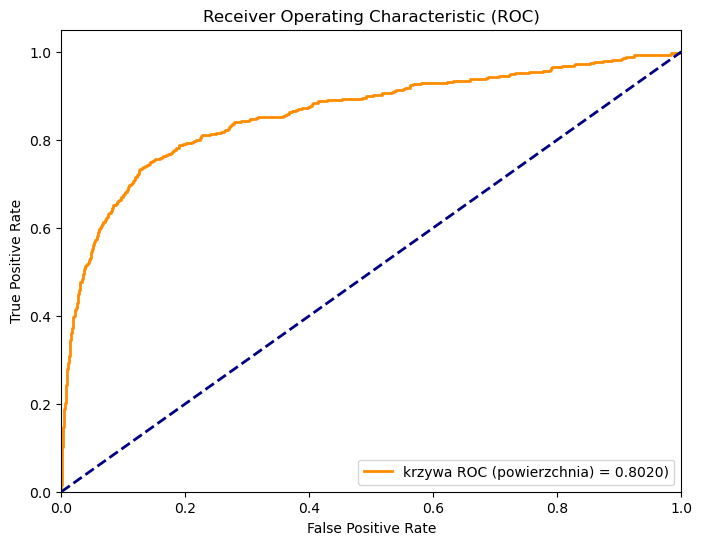

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Oblicz krzywą ROC i pole pod krzywą AUC
fpr, tpr, _ = roc_curve(y_test_cold, clf.decision_function(X_test_cold))
#roc_auc = auc(fpr, tpr)

# Wygeneruj wykres krzywej ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='krzywa ROC (powierzchnia) = {:.4f})'.format(metrics.roc_auc_score(y_test_cold, y_pred)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [165]:
print(classification_report(y_test_cold, y_pred))
confusion_matrix(y_test_cold, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     10243
           1       0.29      0.67      0.40       457

    accuracy                           0.92     10700
   macro avg       0.64      0.80      0.68     10700
weighted avg       0.95      0.92      0.93     10700



array([[9489,  754],
       [ 150,  307]], dtype=int64)

In [169]:
print(classification_report(y_test_cold, y_pred))
confusion_matrix(y_test_cold, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     10243
           1       0.21      0.73      0.33       457

    accuracy                           0.87     10700
   macro avg       0.60      0.80      0.63     10700
weighted avg       0.95      0.87      0.90     10700



array([[8998, 1245],
       [ 125,  332]], dtype=int64)

In [82]:
print(classification_report(y_test_cold, y_pred))
confusion_matrix(y_test_cold, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     10243
           1       0.20      0.74      0.31       457

    accuracy                           0.86     10700
   macro avg       0.59      0.80      0.62     10700
weighted avg       0.95      0.86      0.90     10700



array([[8853, 1390],
       [ 119,  338]], dtype=int64)

In [166]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_cold, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_cold, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("fbeta:",metrics.fbeta_score(y_test_cold, y_pred, beta=2))

print("Balanced Accuracy:",metrics.balanced_accuracy_score(y_test_cold, y_pred))

# 
print("AUC Score:", metrics.roc_auc_score(y_test_cold, y_pred))

Precision: 0.28934967012252594
Recall: 0.6717724288840262
fbeta: 0.5313257182416061
Balanced Accuracy: 0.7990805910894796
AUC Score: 0.7990805910894797


In [170]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_cold, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_cold, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("fbeta:",metrics.fbeta_score(y_test_cold, y_pred, beta=2))

print("Balanced Accuracy:",metrics.balanced_accuracy_score(y_test_cold, y_pred))

# 
print("AUC Score:", metrics.roc_auc_score(y_test_cold, y_pred))

Precision: 0.21052631578947367
Recall: 0.7264770240700219
fbeta: 0.487518355359765
Balanced Accuracy: 0.8024653010616634
AUC Score: 0.8024653010616634


In [83]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_cold, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_cold, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("fbeta:",metrics.fbeta_score(y_test_cold, y_pred, beta=2))

print("Balanced Accuracy:",metrics.balanced_accuracy_score(y_test_cold, y_pred))

# 
print("AUC Score:", metrics.roc_auc_score(y_test_cold, y_pred))

Precision: 0.19560185185185186
Recall: 0.7396061269146609
fbeta: 0.47525309336332966
Balanced Accuracy: 0.8019518479931109
AUC Score: 0.8019518479931109


In [84]:
def train_evaluate(X_train, y_train, X_test, y_test, kernel, gamma, class_weight, C):
    # Budowanie pipeline
    clf = make_pipeline(StandardScaler(), SVC(kernel= kernel, gamma=gamma, class_weight= class_weight, C= C))
    clf.fit(X_train, y_train)
    
    # Tworzenie predykcji
    y_pred = clf.predict(X_test)

     # Metryki
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    fbeta = metrics.fbeta_score(y_test, y_pred, beta=2)
    balanced_accuracy = metrics.balanced_accuracy_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test_cold, y_pred)
    
    
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Fbeta (beta=2): {fbeta:.2f}")
    print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
    print(f"AUC: {auc:.2f}")
    
    # Ramka danych z metrykami
    metrics_df = pd.DataFrame({
        'Precision': [precision],
        'Recall': [recall],
        'Fbeta (beta=2)': [fbeta],
        'Balanced Accuracy': [balanced_accuracy],
        'AUC': [auc]
    })
    
    return metrics_df

In [85]:
#metrics_all = pd.DataFrame()
metrics_df1 = train_evaluate(X_train_cold, y_train_cold, X_test_cold, y_test_cold,kernel= "rbf", gamma='auto', class_weight= 'balanced', C= 50.026961583533485  )#4.769675980918181
metrics_all = pd.concat([metrics_df1, metrics_all])

Precision: 0.46
Recall: 0.54
Fbeta (beta=2): 0.52
Balanced Accuracy: 0.75
AUC: 0.75


NameError: name 'metrics_all' is not defined

In [45]:
metrics_df

Precision    Recall  Fbeta (beta=2)  Balanced Accuracy       AUC
0   0.537291  0.770742         0.70912           0.870545  0.870545

In [63]:
metrics_df #   

Precision    Recall  Fbeta (beta=2)  Balanced Accuracy       AUC
0   0.369903  0.831878        0.665618           0.884287  0.884287

# Optymalizacja parametrów

In [182]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from optuna.pruners import MedianPruner
 

In [183]:
df_cold.shape,X_train_cold.shape,  df_bez_testu.shape,

((53500, 78), (42800, 77), (44862, 78))

In [184]:
# All zimne
# Split the data into two DataFrames: X (features) and y (target variable)
X = df_cold.iloc[:, 1:]  # Specify at least one column as feature(s)
y = df_cold["Tetniak"]  # Specify one column as the target variable

# Split the data into train and test subsets
# You can adjust the test size and random state
X_train_cold, X_test_cold, y_train_cold, y_test_cold = train_test_split(
    X, y, test_size=0.20, random_state=42
)

X_train_cold.shape, X_test_cold.shape, y_train_cold.shape, y_test_cold.shape

((42800, 77), (10700, 77), (42800,), (10700,))

In [185]:
def objective(trial):
    # ładowanie zbioru 

    X = X_train_cold  
    y = y_train_cold  

    
    # Hiperparametry do optymalizacji
    c = trial.suggest_loguniform('svc_c', 1, 100)
    #kernel = trial.suggest_categorical('kernel', [ 'rbf']) # , 'linear', 'poly', 'sigmoid'
    

    degree = 1  # default degree
    
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    #coef0 = trial.suggest_float('coef0', -15.0, 15.0) # dla poly i sigmoid
    
    max_iter = trial.suggest_int('max_iter', 1000, 4000)

    # model
    svc = SVC(C=c, kernel='rbf', degree=degree, gamma=gamma, max_iter=max_iter)
    
    # Tworzenie pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', svc)
    ])
    
    # StratifiedKFold jako funkcja walidacji krzyzowej
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # funkcja celu -> balanced accuracy
    return cross_val_score(pipe, X, y, cv=stratified_kfold, scoring='balanced_accuracy').mean()
    


In [186]:
# stworzenie podejścia gdzie funkcja celu jest maksymalizowana
study = optuna.create_study(direction='maximize') 

[I 2023-11-06 20:40:39,449] A new study created in memory with name: no-name-a5d97e88-b71c-41c8-bfb5-743676db471e


In [187]:
import warnings
warnings.filterwarnings("ignore")

In [188]:
study.optimize(objective, n_trials=400 )  # specify the number of trials.


[I 2023-11-06 20:41:50,829] Trial 0 finished with value: 0.5335599813389549 and parameters: {'svc_c': 1.010099023050394, 'gamma': 'auto', 'max_iter': 1459}. Best is trial 0 with value: 0.5335599813389549.
[I 2023-11-06 20:42:37,645] Trial 1 finished with value: 0.54295951704093 and parameters: {'svc_c': 2.4642071853878416, 'gamma': 'scale', 'max_iter': 2890}. Best is trial 1 with value: 0.54295951704093.
[I 2023-11-06 20:43:16,279] Trial 2 finished with value: 0.5768927218624033 and parameters: {'svc_c': 3.5483068184856004, 'gamma': 'auto', 'max_iter': 2156}. Best is trial 2 with value: 0.5768927218624033.
[I 2023-11-06 20:43:45,226] Trial 3 finished with value: 0.6254088329194317 and parameters: {'svc_c': 94.03762485846742, 'gamma': 'scale', 'max_iter': 1759}. Best is trial 3 with value: 0.6254088329194317.
[I 2023-11-06 20:44:29,080] Trial 4 finished with value: 0.550406280460759 and parameters: {'svc_c': 2.721853642837247, 'gamma': 'auto', 'max_iter': 2600}. Best is trial 3 with val

In [189]:
print('Licza iteracji: ', len(study.trials))
print('Najlepsze podejscie:')
trial = study.best_trial

print('Wartosc: ', trial.value)
print('Parametry: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')
# dla cold C 4.769675980918181 7.306458969884712, 8.10225677370286, gamma auto, rbf
# dla sah C 0.6854638962825292, 1.1704227588230203, 0.3013116165319417 gamma scale, rbf

Licza iteracji:  400
Najlepsze podejscie:
Wartosc:  0.6635062541925889
Parametry: 
    svc_c: 2.442369288737296
    gamma: auto
    max_iter: 1175


In [190]:
import optuna.visualization as vis
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_rank
from optuna.visualization import plot_slice
from optuna.visualization import plot_timeline
vis.plot_optimization_history(study)


In [191]:
plot_parallel_coordinate(study)


In [192]:
plot_parallel_coordinate(study, params=[ "svc_c", "gamma"])

In [193]:
plot_slice(study, params=[ "svc_c"])

In [194]:
plot_param_importances(study)

# Dalex

In [87]:
import dalex as dx

e:\Coding\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [88]:
exp = dx.Explainer(clf,X_train_cold, y_train_cold)

Preparation of a new explainer is initiated

  -> data              : 42800 rows 77 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 42800 values
  -> model_class       : sklearn.svm._classes.SVC (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x000002DA900A0DC0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


e:\Coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


  -> predicted values  : min = 0.0, mean = 0.168, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.126, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


In [89]:
mp = exp.model_performance(model_type = 'classification')
mp.result

recall  precision        f1  accuracy       auc
SVC  0.912681   0.228297  0.365235  0.866729  0.888697

In [90]:
# istotnosc zmiennych modelu
vi = exp.model_parts()
vi.result

variable  dropout_loss label
0             Morfologia__% BAZO      0.106632   SVC
1               Triglicerydy__TG      0.106737   SVC
2     Badanie ogólne moczu__mPRO      0.107866   SVC
3      Współczynnik APTT__W APTT      0.107906   SVC
4                Morfologia__PLT      0.108157   SVC
..                           ...           ...   ...
74  Wskaźnik protrombinowy__W PT      0.139421   SVC
75               Morfologia__MPV      0.141347   SVC
76               Morfologia__PDW      0.151839   SVC
77             Morfologia__P-LCR      0.166780   SVC
78                    _baseline_      0.498602   SVC

[79 rows x 3 columns]

In [91]:
vi.result.head(25)  #['Pomiar parametrów życiowych__BMI', 'Morfologia__%NRBC', 'Troponina I wysokoczuła__hsTnI', 'Badanie osadu moczu__mNabPłaskie', 'CK-MB mass__CK-MB', 'Badanie ogólne moczu__mLEU', 'Morfologia__MCHC', 'Morfologia__HGB', 'Morfologia__WBC', 'Czas protrombinowy__INR', 'Bilirubina całkowita we krwi__BIL', 'Morfologia__% MONO', 'Triglicerydy__TG', 'Morfologia__MCH']

variable  dropout_loss label
0                                  Morfologia__% BAZO      0.106632   SVC
1                                    Triglicerydy__TG      0.106737   SVC
2                          Badanie ogólne moczu__mPRO      0.107866   SVC
3                           Współczynnik APTT__W APTT      0.107906   SVC
4                                     Morfologia__PLT      0.108157   SVC
5                                      Morfologia__IG      0.108579   SVC
6                   Transaminaza asparaginianowa__AST      0.109095   SVC
7                    Badanie osadu moczu__mNabPłaskie      0.109210   SVC
8                          Badanie ogólne moczu__mBLO      0.109220   SVC
9                                   Morfologia__%NRBC      0.109566   SVC
10                      Badanie osadu moczu__mErytroc      0.109621   SVC
11                   Pomiar parametrów życiowych__BMI      0.109670   SVC
12                                       _full_model_      0.109670   SVC
13                                   Morfologia__MONO      0.109770   SVC
14  Czas częściowej tromboplastyny po aktywacji__APTT      0.110347   SVC
15                       Badanie ogólne moczu__mBarwa      0.110362   SVC
16                       Badanie osadu moczu__mLeukoc      0.110455   SVC
17                  Gammaglutamylotranspeptydaza__GGT      0.110669   SVC
18                                    Morfologia__RBC      0.110935   SVC
19                                    Morfologia__HGB      0.110983   SVC
20                         Badanie ogólne moczu__mURO      0.111134   SVC
21                        Wskaźnik protrombinowy__INR      0.111319   SVC
22                                    Morfologia__HCT      0.111585   SVC
23                                   Morfologia__BAZO      0.111605   SVC
24  Czas częściowej tromboplastyny po aktywacji__W...      0.111606   SVC

In [92]:
vi.plot(max_vars=15)

In [93]:
vi_grouped = exp.model_parts(variable_groups={'Wywiad': ['PACJENT-WIEK', 'Pomiar parametrów życiowych__BMI', 'PACJENT-PŁEĆ'],
                                              'Morfologia': ['Morfologia__% BAZO', 'Morfologia__% EO', 'Morfologia__% IG', 'Morfologia__% LYMPH','Morfologia__% MONO', 'Morfologia__% NEUT', 
                                                             'Morfologia__%NRBC','Morfologia__BAZO', 'Morfologia__EO', 'Morfologia__HCT','Morfologia__HGB', 'Morfologia__IG', 'Morfologia__LYMPH',
                                                             'Morfologia__MCH', 'Morfologia__MCHC', 'Morfologia__MCV', 'Morfologia__MONO', 'Morfologia__MPV', 'Morfologia__NEUT',
                                                             'Morfologia__NRBC', 'Morfologia__P-LCR', 'Morfologia__PDW', 'Morfologia__PLT', 'Morfologia__PLT CT', 'Morfologia__RBC',
                                                             'Morfologia__RDW', 'Morfologia__WBC'],
                                              'Badanie ogólne moczu': ['Badanie ogólne moczu__mASA','Badanie ogólne moczu__mBIL', 'Badanie ogólne moczu__mBLO','Badanie ogólne moczu__mBarwa', 
                                                                       'Badanie ogólne moczu__mClar', 'Badanie ogólne moczu__mGLU', 'Badanie ogólne moczu__mKET', 'Badanie ogólne moczu__mLEU', 
                                                                       'Badanie ogólne moczu__mNIT', 'Badanie ogólne moczu__mPRO', 'Badanie ogólne moczu__mURO','Badanie ogólne moczu__mSG', 
                                                                       'Badanie ogólne moczu__mpH', 'Badanie osadu moczu__mErytroc', 'Badanie osadu moczu__mLeukoc', 
                                                                       'Badanie osadu moczu__mNabPłaskie', 'Badanie osadu moczu__mPasŚluzu'],
                                              'Elektrolity': ['Elektrolit_K', 'Elektrolit_Na'],
                                              'Wskaźnik protrombinowy i Czas protrombinowy': ['Czas protrombinowy__INR', 'Czas protrombinowy__PT','Czas protrombinowy__W PT','Wskaźnik protrombinowy__INR', 
                                                             'Wskaźnik protrombinowy__W PT'],
                                              'Kreatynina we krwi': ['Kreatynina we krwi__KREA', 'Kreatynina we krwi__eGFR -MDRD','Kreatynina we krwi__eGFR CKD'],
                                              'Pozostałe': [ 'Azot mocznika we krwi__BUN','Białko C-reaktywne__CRP', 'Bilirubina całkowita we krwi__BIL','CK-MB mass__CK-MB', 'Cholesterol HDL__HDL',
                                                             'Cholesterol całkowity__CHOL','Czas częściowej tromboplastyny po aktywacji__APTT','Czas częściowej tromboplastyny po aktywacji__W APTT',
                                                             'Fosfataza alkaliczna__ALP','Gammaglutamylotranspeptydaza__GGT', 'Glukoza__GLU', 'INR__INR', 'Transaminaza alaninowa__ALT',
                                                             'Transaminaza asparaginianowa__AST', 'Triglicerydy__TG','Wapń całkowity we krwi__Ca','Wskaźnik filtracji kłębuszkowej (wg CKD-EPI)__eGFR CKD',
                                                             'Wskaźnik filtracji kłębuszkowej (wg MDRD)__eGFR -MDRD','Współczynnik APTT__W APTT', 'Troponina I wysokoczuła__hsTnI']})
vi_grouped.result

variable  dropout_loss label
0                                 _full_model_      0.102543   SVC
1                                  Elektrolity      0.113029   SVC
2                                       Wywiad      0.122237   SVC
3                           Kreatynina we krwi      0.124558   SVC
4  Wskaźnik protrombinowy i Czas protrombinowy      0.139189   SVC
5                         Badanie ogólne moczu      0.174168   SVC
6                                    Pozostałe      0.230611   SVC
7                                   Morfologia      0.350050   SVC
8                                   _baseline_      0.506800   SVC

In [94]:
vi_grouped.plot()

In [41]:
X_test_cold.iloc[2, :]

PACJENT-PŁEĆ                        1.000000
Badanie ogólne moczu__mASA          0.000000
Badanie ogólne moczu__mBIL          0.000000
Badanie ogólne moczu__mBLO          0.000000
Badanie ogólne moczu__mBarwa        0.000000
                                     ...    
Wskaźnik protrombinowy__W PT       94.131987
Współczynnik APTT__W APTT           0.986604
Troponina I wysokoczuła__hsTnI      0.104950
Elektrolit_Na                     130.000000
Elektrolit_K                        4.500000
Name: 9983, Length: 77, dtype: float64

Ceteris Paribus

In [96]:
pdp = exp.model_profile(type='partial')
pdp.plot(variables=['Morfologia__P-LCR'])

Calculating ceteris paribus:   0%|          | 0/77 [00:00<?, ?it/s]

Calculating ceteris paribus: 100%|██████████| 77/77 [1:26:03<00:00, 67.06s/it]


In [105]:
pdp.plot(variables=['PACJENT-WIEK'])

In [97]:
#pdp = exp.model_profile(type='partial')
pdp.plot(variables=["Azot mocznika we krwi__BUN"])

In [107]:
#pdp = exp.model_profile(type='partial')
pdp.plot(variables=['Morfologia__PDW'])

In [99]:
#pdp = exp.model_profile(type='partial')
pdp.plot(variables=['Morfologia__NEUT'])

In [100]:
#pdp = exp.model_profile(type='partial')
pdp.plot(variables=['Morfologia__PDW', 'Morfologia__P_LCR'])

In [101]:
pdp.plot(variables=['Morfologia__P-LCR'])

In [102]:
#features_to_plot = ['Morfologia__PDW', 'Morfologia__P_LCR']

for feature in features_to_plot:
    #pdp = exp.predict_parts(feature=feature)
    pdp.plot()